In [8]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats


# Quantification d'une loi continue

Implémentation de la méthode de Lloyd pour la recherche des N centroïdes des cellules de Voronoï. (dim=1)

Objectif : Minimiser la distortion

In [232]:

""""
Entrée:
    X_cible: array n points de X v.a continue
    N: nb de centroides que l'on veut
    tol: 1e-5
    kmax: nombre d'itération max

n=1000
N=10
k_max=3000
tol=1e-5

X_cible=np.zeros((n,1))
centro=np.zeros((N,1)) # Choisir des points aléatoires sur la densité cible
Assignation=np.zeros((n,1))

compt=0
dist_cour=1
while dist_cour>tol:
    
    ## Recherche des centres les plus proches et assignation.

    for i in range(n):
        Tab_temp=np.zeros((N,1))
        for j in range(N):
            Tab_temp[j]=np.abs(X_cible[i]-centro[j])
        print("Tableau ",Tab_temp)
        K=np.argmin(Tab_temp)
        Assignation[i]=centro[K]
        
    ## Actualisation des centres
   
    for i in range(N):
        Tab_temp=np.where(Assignation==centro[i])[0]
        tab_temp2=[]
        for j in (Tab_temp):
            tab_temp2.append(X_cible[j])
        
        centro[i]=np.mean(tab_temp2)

        
    compt+=1
    
    dist_cour=np.mean(np.abs(X_cible-Assignation)**2)
    


Sortie:
    quanti_N: N centroïdes qui minimise la distortion
    dist_tab: l'évolution de la distortion en fonction des itérations
    

"""

'"\nEntrée:\n    X_cible: array n points de X v.a continue\n    N: nb de centroides que l\'on veut\n    tol: 1e-5\n    kmax: nombre d\'itération max\n\nn=1000\nN=10\nk_max=3000\ntol=1e-5\n\nX_cible=np.zeros((n,1))\ncentro=np.zeros((N,1)) # Choisir des points aléatoires sur la densité cible\nAssignation=np.zeros((n,1))\n\ncompt=0\ndist_cour=1\nwhile dist_cour>tol:\n    \n    ## Recherche des centres les plus proches et assignation.\n\n    for i in range(n):\n        Tab_temp=np.zeros((N,1))\n        for j in range(N):\n            Tab_temp[j]=np.abs(X_cible[i]-centro[j])\n        print("Tableau ",Tab_temp)\n        K=np.argmin(Tab_temp)\n        Assignation[i]=centro[K]\n        \n    ## Actualisation des centres\n   \n    for i in range(N):\n        Tab_temp=np.where(Assignation==centro[i])[0]\n        tab_temp2=[]\n        for j in (Tab_temp):\n            tab_temp2.append(X_cible[j])\n        \n        centro[i]=np.mean(tab_temp2)\n\n        \n    compt+=1\n    \n    dist_cour=np.mea

In [19]:
def kmeans_Lloyd(X,N,kmax=300):
    
    """
    Entrée:
        X: Echantillon de taille n x m suivant une densité f cible
        N: Nombre de quantificateur:
        kmax: nombre d'itération max
    
    Sortie:
        lst_centre: liste finale des centroïdes
        lst_proba: liste des probabilités associées aux centres
        dist_tab: Tableau de l'évolution de la distortion


    """


    # Initialisation pour éviter les problèmes d'affectations
    X_cible=np.copy(X) # On récupère la taille de l'échantillon
    n=len(X_cible)
    lst_centre=npr.choice(X_cible,N)
    lst_centre=np.sort(lst_centre) # Tri des centres pour minimiser le problème de quantificateur isolée auquel aucun point n'est associé

    dist_tab=[] # Récupération de l'évolution de la distortion

    for it in range(kmax):
    # Initialisation des variables courantes à l'itération it
        Assignation_cour=np.zeros(N)  # pour une version multidimensionelle on peut remplacer la ligne par " Assignation_cour=np.zeros((N,X_cible.shape[1]))"
        compteur_cour=np.zeros(N)
        dist_total_it=0

        for x in X_cible:
            indice,dist_x=plusproche(x,lst_centre)

            # Actualisation des variables courante pour calculer le nouveau centre associé aux indices et de la distortion
            Assignation_cour[indice]=Assignation_cour[indice]+x
            compteur_cour[indice]+=1
            dist_total_it+=dist_x

        # Actualisation des centres
        for i in range(N):
            if(compteur_cour[i]>0):
                lst_centre[i]=Assignation_cour[i]/compteur_cour[i]
            else:
                lst_centre=lst_centre

        dist_tab.append(dist_total_it)

    # Calcul des proba de chaque cellules
    lst_proba=compteur_cour/n

    return lst_centre, lst_proba, dist_tab


On définit ci-dessous la fonction plus proche qui va calculé l'indice du centroïde le plus proche d'un point $X_{i}$ de notre échantillon $X_{cible}$.

Le principe est le suivant:

* Initialisation: on initialise la distance minimal courante au float le plus large et l'indice à -1. Si on le retrouve en sortie d'algorithme on pourra voir s'il y a un problème.

* Boucle sur la liste des centroïde: 
    1. On calcule la distance au centre de la cellule $C_{i}$ 
    2. On regarde si elle est plus petite que la distance minimale courante
    3. On associe l'indice à l'indice courant de la boucle si la condition est vérifiée.





In [15]:

def plusproche(Xi,lst_centre):
    """

    Entrée:
        Xi: Point i de notre échantillon cible parmis n points
        lst_centre: Liste des N-quantificateurs au moment de l'appel de la fonction


    Sortie:
        indice: indice du centroïde le plus proche
        dist_min: distortion locale

    """
    dist_min=sys.float_info.max # initialisation de dist_cour arbitrairement grand pour simplifier la règle de décision
    indice=-1 


    for i,ci in enumerate(lst_centre): # enumerate nous permet d'avoir accès au compteur et à l'objet itéré
        dist=np.abs(Xi-ci)**2
        if(dist<dist_min_cour):
            dist_min_cour=dist
            indice=i

    return indice,dist_min
    
        

In [20]:
n=100
N=20

X_cible=npr.rand(n)

lst_centre, lst_proba, dist_tab=kmeans_Lloyd(X=X_cible,N=N,kmax=100)

NameError: name 'sys' is not defined

In [149]:
def actu_centre(assignation,centro,N):
    centre_actu=np.copy(centro)
    Assignation=np.copy(assignation)

    for i in range(N):
        Tab_temp=np.where(Assignation==centro[i])[0]
        tab_temp2=[]
        for j in (Tab_temp):
            tab_temp2.append(X_cible[j])
        if tab_temp2:
                centro[i]=np.mean(tab_temp2)
        else:
            centro[i]=centro[i]
    return centre_actu

In [229]:
def calculpoids(centre,assignation,N):
    centro=np.copy(centre)
    Assignation=np.copy(assignation)
    Tab_return=np.zeros((N,1))
    for i in range(N):
        Tab_temp=np.where(Assignation==centro[i])[0]
        if(len(Tab_temp)!=0):
            Tab_return[i]=1/len(Tab_temp)
        else:
            Tab_return[i]=0

In [154]:
n=100
N=20

X_cible=npr.rand(n)
centro=npr.rand(N)

A=kmeans_Lloyd(X=X_cible,N=N)


[0.06970286 0.06970286 0.0876596  0.09155826 0.10329963 0.16042739
 0.18011646 0.19242755 0.26199198 0.4049879  0.53638413 0.65454599
 0.70636756 0.83144081 0.85955177 0.8929009  0.90491009 0.90998351
 0.93933128 0.94721533]


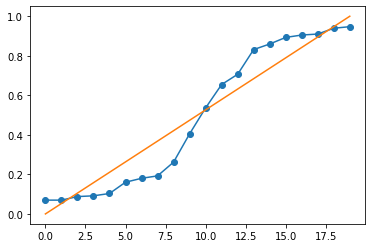

In [151]:
print(A[1])
plt.plot(A[1],marker='o')
x=np.linspace(0,1,N)
plt.plot(x)
plt.show()

In [80]:
n=100
N=20

X_cible=scipy.stats.norm(n)
centro=npr.rand(N)

A=kmeans_Lloyd(X=X_cible,N=N)

array([0.07488368, 0.24169075, 0.39477839, 0.55039712, 0.63577319,
       0.7217072 , 0.81223199, 0.88912056, 0.93471624, 0.97474259])

In [207]:
n=100
N=10
X_cible=npr.normal(-1,4,n)
A=kmeans_Lloyd(X=X_cible,N=N)
print(A[1])

[-7.69305355 -4.63279935 -4.63279935 -2.47432643 -2.35372818  1.79553717
  2.30478511  2.39802948  2.43432351  3.00280395]


In [208]:
k=list(np.arange(0,N))
print("Moyenne : ",np.mean(A[1]))
print("\nVariance :",np.std(A[1]))

Moyenne :  -0.9851227648609967

Variance : 3.650968194587003


In [185]:
from sklearn.cluster import KMeans

In [227]:
n=100
N=10
X_cible=npr.normal(-1,4,n).reshape(-1, 1)
kmeans = KMeans(n_clusters=N).fit(X_cible)
print("Moyenne : ",np.mean(kmeans.cluster_centers_))
print("\nVariance :",np.std(kmeans.cluster_centers_))

Moyenne :  -1.102985463839947

Variance : 6.23792628233816


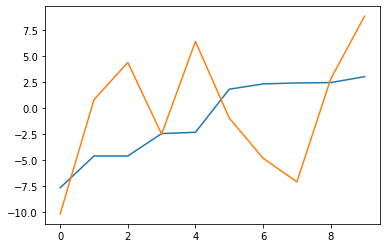

In [213]:
plt.plot(A[1])
plt.plot(np.sort(kmeans.cluster_centers_))

In [230]:
print(calculpoids(A[1],A[0],N))


None


In [233]:
import scipy.spatial.distance as distance

In [243]:
n=1000
N=100
X_cible=npr.normal(0,1,n)
centro=npr.choice(X_cible,N)

In [252]:
distance.cdist(np.atleast_2d(X_cible),np.atleast_2d(centro))

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

In [231]:
"""
npr.seed(1)
n=200
N=10

X_cible=npr.rand(n)
centro=random.choice(X_cible,N) # Choisir des points aléatoires sur la densité cible
Assignation=np.zeros((n,1))
#print("X:" ,X_cible,"\n \n")

DIST_COUR=[]
stockage=[np.copy(centro)]
compt=0
dist_cour=1

while(dist_cour>tol and compt<100):
    for i in range(n):
        Tab_temp=np.zeros((N,1))
        for j in range(N):
            Tab_temp[j]=np.abs(X_cible[i]-centro[j])
        
        K=np.argmin(Tab_temp)
        Assignation[i]=centro[K]

    print("Centre :",centro,"\n \n")
    print("Assignation: " ,Assignation,"\n \n \n")


    for i in range(N):
            Tab_temp=np.where(Assignation==centro[i])[0]
            tab_temp2=[]
            for j in (Tab_temp):
                tab_temp2.append(X_cible[j])
            if tab_temp2:
                centro[i]=np.mean(tab_temp2)
            else:
                centro[i]=centro[i]


    compt+=1
        
    dist_cour=np.mean(np.abs(X_cible-Assignation)**2)
    DIST_COUR.append(dist_cour)
    print(dist_cour)
    print("Nouveau Centre: ", centro)

stockage.append(np.copy(centro))
np.transpose(stockage)
stockage=np.asarray(stockage)
#print("\n \n Stockage: ",stockage,"\n")

plt.plot(stockage,'o',label="Oui")
plt.legend()
plt.show()
"""


'\nnpr.seed(1)\nn=200\nN=10\n\nX_cible=npr.rand(n)\ncentro=random.choice(X_cible,N) # Choisir des points aléatoires sur la densité cible\nAssignation=np.zeros((n,1))\n#print("X:" ,X_cible,"\n \n")\n\nDIST_COUR=[]\nstockage=[np.copy(centro)]\ncompt=0\ndist_cour=1\n\nwhile(dist_cour>tol and compt<100):\n    for i in range(n):\n        Tab_temp=np.zeros((N,1))\n        for j in range(N):\n            Tab_temp[j]=np.abs(X_cible[i]-centro[j])\n        \n        K=np.argmin(Tab_temp)\n        Assignation[i]=centro[K]\n\n    print("Centre :",centro,"\n \n")\n    print("Assignation: " ,Assignation,"\n \n \n")\n\n\n    for i in range(N):\n            Tab_temp=np.where(Assignation==centro[i])[0]\n            tab_temp2=[]\n            for j in (Tab_temp):\n                tab_temp2.append(X_cible[j])\n            if tab_temp2:\n                centro[i]=np.mean(tab_temp2)\n            else:\n                centro[i]=centro[i]\n\n\n    compt+=1\n        \n    dist_cour=np.mean(np.abs(X_cible-Assi

1. Item 1
2. Item 2 ( we can type 1. and the markdown will automatically numerate them) 
* First Item
  * Nested item 1
  * Nested item 2
    1. Keep going
    1. Yes
  
* Second Item
- First Item
- Second Item